In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import plotly.express as px
#Load File into Excel and Basic Cleaning of NaN values in Relevant Columns
df_original = pd.read_excel('NSW_Road_Crash_Data_2017-2021_CRASH.xlsx')
df_original = pd.read_excel('NSW_Road_Crash_Data_2017-2021_CRASH.xlsx')
df = df_original.dropna(subset=df_original.columns[:15])
df = df[df['Speed_limit'] != 'unknown']

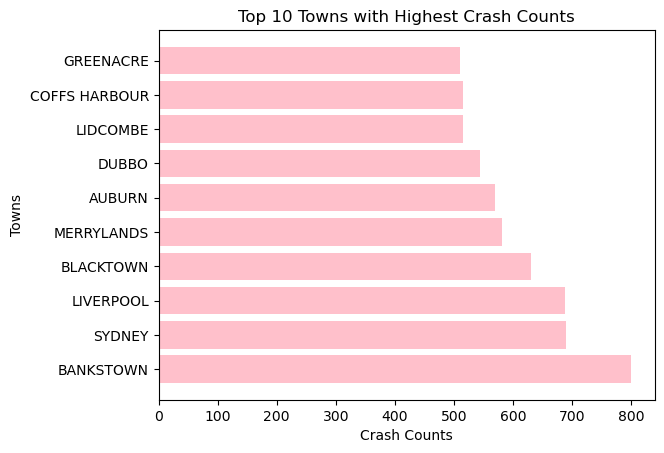

In [2]:
#Q1
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns

df_towns = df.copy()
crash_count_bytown = df_towns.groupby('Town')['CrashID'].count().sort_values(ascending=False)
top_10 = crash_count_bytown.head(10)
#Plotting
plt.barh(top_10.index, top_10.values, color='Pink')
plt.xlabel('Crash Counts')
plt.ylabel('Towns')
plt.title('Top 10 Towns with Highest Crash Counts')
plt.show()

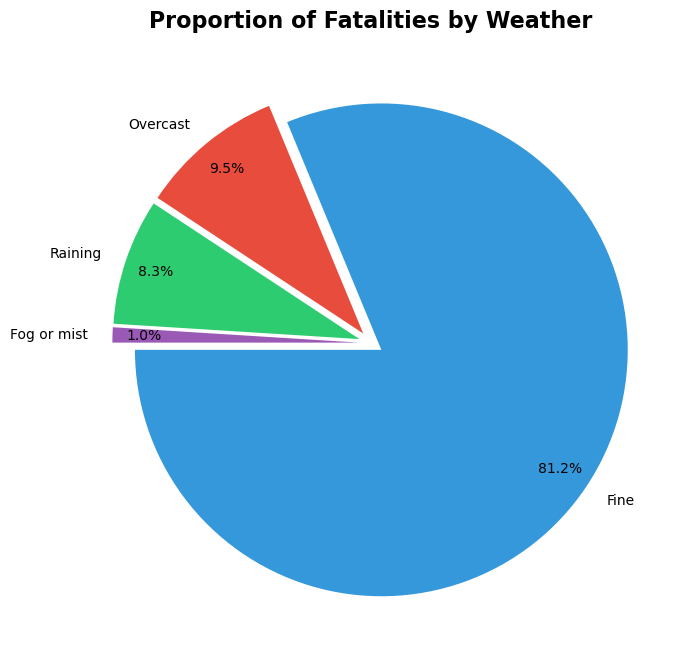

In [3]:
#Q2
#Choosing Fatalities
fatalities = df[df['Degree_of_crash'] == 'Fatal']

#Choosing Weather Conditions
prevalent_conditions = ['Fine','Overcast', 'Raining','Fog or mist']
weather = fatalities[fatalities['Weather'].isin(prevalent_conditions)]

#Count of Weather
weather_counts = weather['Weather'].value_counts()

#Choosing Colours
custom_colours =  ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6']

#Make the slices separate from each other
explode = [0.05] * len(weather_counts)

#Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(weather_counts, labels = weather_counts.index, autopct='%1.1f%%',startangle=180, pctdistance=0.87,
        labeldistance=1.1, colors = custom_colours, explode = explode)

plt.title('Proportion of Fatalities by Weather', fontsize=16, fontweight='bold', va='center', pad=10)
plt.show()

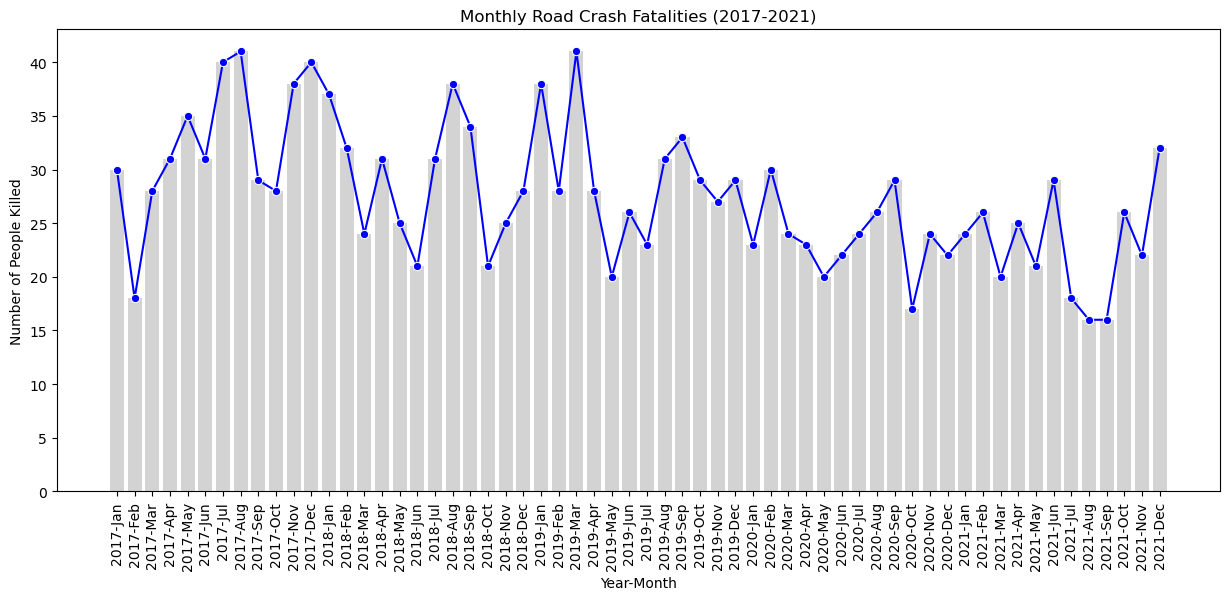

In [4]:
#Q3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

filtered_df = df.copy()

filtered_df = df[df['Year_of_crash'] >= 2017].copy()

# Month Names to Numbers and Year to Int
month_to_num = {month: index for index, month in enumerate(calendar.month_name) if month}
filtered_df['Year_of_crash'] = filtered_df['Year_of_crash'].astype(int)
filtered_df['Month_of_crash'] = filtered_df['Month_of_crash'].map(month_to_num)

# Group by year and month, then sum the fatalities
grouped_df = filtered_df.groupby(['Year_of_crash', 'Month_of_crash'])['No_killed'].sum().reset_index()

# Month numbers back to month names for plotting
grouped_df['Month_of_crash'] = grouped_df['Month_of_crash'].apply(lambda x: calendar.month_abbr[x])

# Create 'YearMonth' column for plotting
grouped_df['YearMonth'] = grouped_df['Year_of_crash'].astype(str) + '-' + grouped_df['Month_of_crash']

# Plotting
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=grouped_df, x='YearMonth', y='No_killed', color='lightgrey')

sns.lineplot(data=grouped_df, x='YearMonth', y='No_killed', marker='o', color='blue', ax=ax)

ax.set_xticks(range(len(grouped_df['YearMonth'])))
ax.set_xticklabels(grouped_df['YearMonth'], rotation=90)

ax.set_title('Monthly Road Crash Fatalities (2017-2021)')
ax.set_xlabel('Year-Month')
ax.set_ylabel('Number of People Killed')

plt.show()

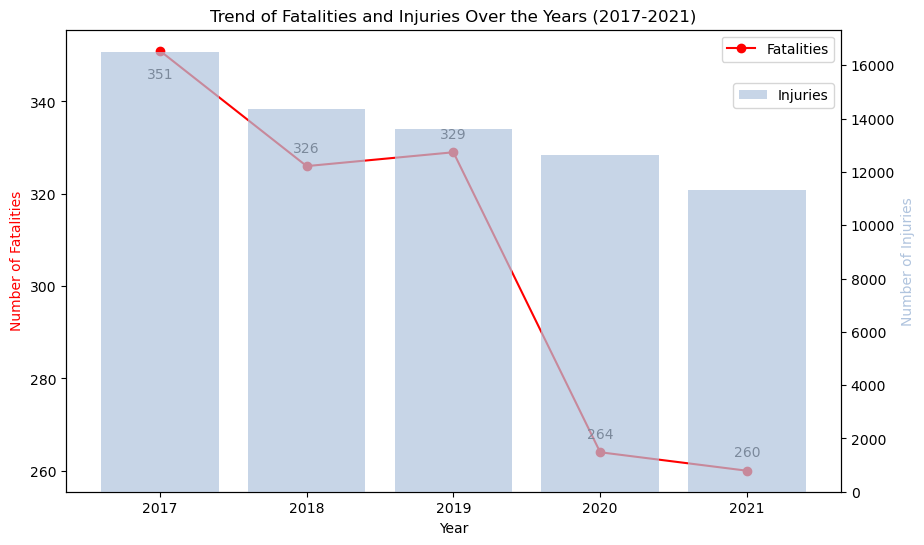

In [5]:
#Q4
df_q4 = df[(df['Year_of_crash'] >= 2017) & (df['Year_of_crash'] <= 2021)].copy()

# Filter and count fatalities and injuries per year
fatalities = df_q4[df_q4['Degree_of_crash'] == 'Fatal']['Year_of_crash'].value_counts().sort_index()
injuries = df_q4[df_q4['Degree_of_crash'] == 'Injury']['Year_of_crash'].value_counts().sort_index()

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for injuries
ax2 = ax1.twinx()
ax2.bar(injuries.index, injuries.values, color='lightsteelblue', alpha=0.7, label='Injuries')
ax2.set_ylabel('Number of Injuries', color='lightsteelblue')


# Line plot for fatalities with labels
ax1.plot(fatalities.index, fatalities.values, color='red', label='Fatalities', marker='o')
for i, txt in enumerate(fatalities.values):
    offset = (0, -20) if i == 0 else (0, 10)  # Label moving
    ax1.annotate(txt, (fatalities.index[i], fatalities.values[i]), textcoords="offset points", xytext=(offset), ha='center')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Fatalities', color='red')


plt.title('Trend of Fatalities and Injuries Over the Years (2017-2021)')
ax1.legend(loc='upper right')
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

plt.show()

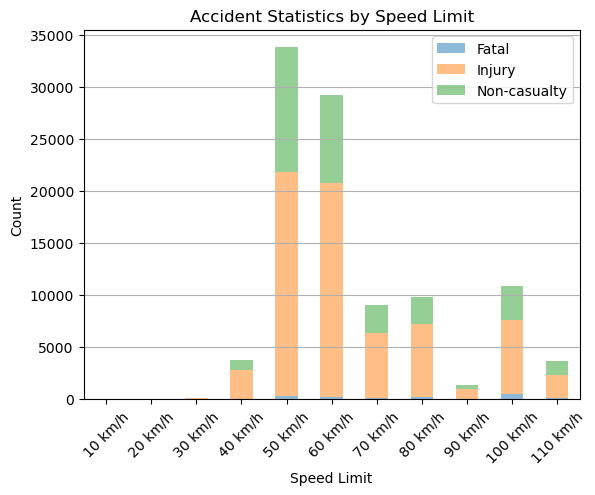

In [6]:
#Q5
import pandas as pd
import matplotlib.pyplot as plt

df_copy = df.copy()

# Replacing 'Unknown' in 'Speed_limit' with the mode for cleaning
mode_speed_limit = df_copy['Speed_limit'].mode()[0]
df_copy['Speed_limit'] = df_copy['Speed_limit'].replace('Unknown', mode_speed_limit)

# Extracting numeric part from 'Speed_limit'
df_copy['Speed_limit_numeric'] = df_copy['Speed_limit'].str.extract('(\d+)').astype(int)

# Grouping, counting, and unstacking
grouped_data = df_copy.groupby(['Speed_limit_numeric', 'Speed_limit', 'Degree_of_crash']).size().unstack(fill_value=0)

# Sorting by the numeric part of 'Speed_limit' and resetting index
grouped_data = grouped_data.sort_index().reset_index()

# Dropping the numeric part used for sorting and setting 'Speed_limit' as index
grouped_data = grouped_data.drop('Speed_limit_numeric', axis=1).set_index('Speed_limit')

# Renaming to 'Non-casualty'
grouped_data = grouped_data.rename(columns={'Non-casualty (towaway)': 'Non-casualty'})

# Drop rows with any null values
grouped_data = grouped_data.dropna()


# Plotting the stacked bar chart
ax = grouped_data.plot(kind='bar', stacked=True, alpha=0.5)
plt.xlabel('Speed Limit')
plt.ylabel('Count')
plt.title('Accident Statistics by Speed Limit')
ax.set_xticklabels(grouped_data.index, rotation=45)

# Adding horizontal gridlines
ax.yaxis.grid(True)

# Removing the legend title
ax.legend(title='')

plt.show()

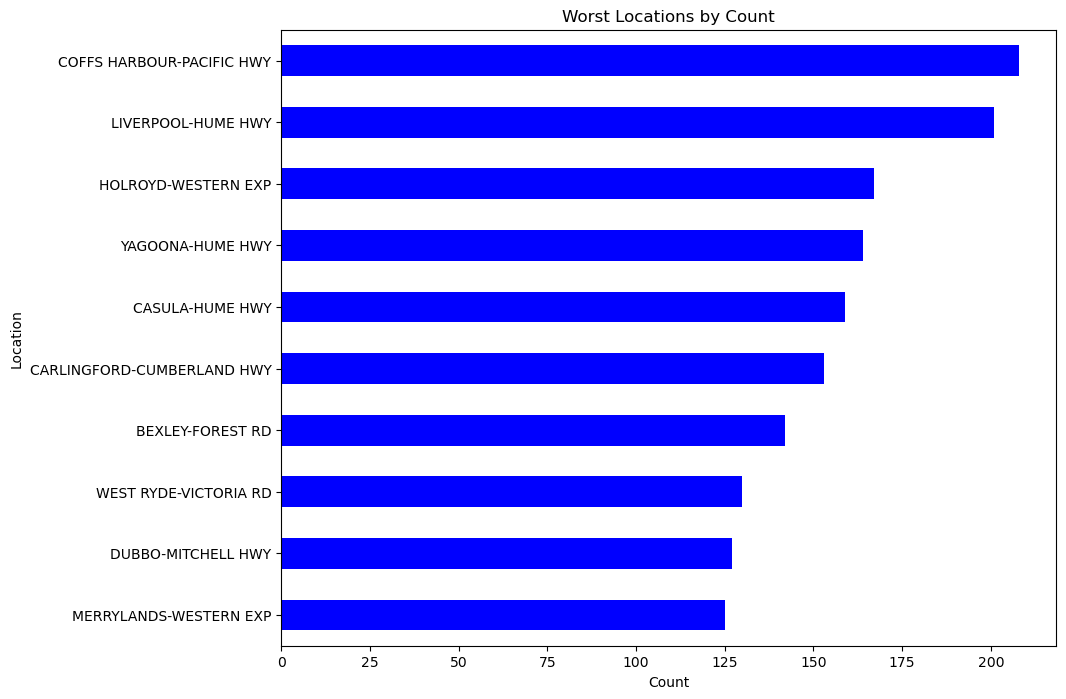

In [7]:
#Q6
df_street_crash = df.copy()

#Street Location Columns
df_street_crash['Street_Location'] = df['Town'] + "-" + df['Street_of_crash'] + " " + df['Street_type']

crash_count_location = df_street_crash.groupby('Street_Location').size()

# Sorting the counts and getting the top 10 locations
top_10_crash_locations = crash_count_location.sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 8))
top_10_crash_locations.plot(kind='barh', color='blue')
plt.xlabel('Count')
plt.ylabel('Location')
plt.title('Worst Locations by Count')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest number on top
plt.show()

In [8]:
#Q7
import plotly.graph_objects as go
import plotly.express as px

#Magnitude
df['Magnitude'] = df['No_killed'] + df['No_seriously_injured']

# Filter out rows where the magnitude is 0
dfclean = df[df['Magnitude'] > 0]

fig = go.Figure()

# Add a trace for each year
for year in range(2017, 2022):
    year_data = dfclean[dfclean['Year_of_crash'] == year]
    fig.add_trace(
        go.Densitymapbox(
            lat=year_data['Latitude'],
            lon=year_data['Longitude'],
            z=year_data['Magnitude'],
            radius=10
        )
    )

# Title and Labels
fig.update_layout(
    title_text="Road Crash Density Heatmap in NSW",
    mapbox_style='open-street-map',
    mapbox=dict(center=dict(lat=-33.87, lon=151.21), zoom=5)
)

# Slider
steps = []
for i in range(2017, 2022):
    step = dict(
        method="update",
        args=[{"visible": [year == i for year in range(2017, 2022)]},
              {"title": f"Road Crash Density Heatmap in NSW: {i}"}],
        label=str(i)
    )
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Year: "},
    steps=steps
)]

fig.update_layout(sliders=sliders)

fig.show()

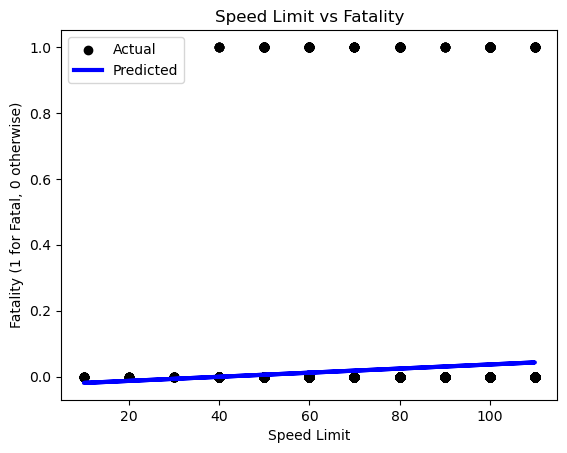

Coefficients: [0.00062133]
Intercept: -0.025238273590088692
Mean Squared Error: 0.013900511100232753
R^2 Score: 0.011184959067194744


In [9]:
#Data Exploration and Predictive Modelling
#Q1
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df_clean_speed = df.copy()
df_clean_speed = df_clean_speed[df_clean_speed['Speed_limit'] != 'Unknown']

# Changing 'Degree_of_crash' to a numeric variable for regression analysis
crash_severity_mapping = {'Fatal': 2, 'Injury': 1, 'Non-casualty': 0}
df_clean_speed['Degree_of_crash_encoded'] = df_clean_speed['Degree_of_crash'].map(crash_severity_mapping)
df_clean_speed['Degree_of_crash_encoded'] = df_clean_speed['Degree_of_crash_encoded'].fillna(0)
df_clean_speed['Speed_limit_numeric'] = df_clean_speed['Speed_limit'].str.extract('(\d+)').astype(int)

# 'Fatality' Column
df_clean_speed['Fatality'] = df_clean_speed['Degree_of_crash'].apply(lambda x: 1 if x == 'Fatal' else 0)

X = df_clean_speed[['Speed_limit_numeric']]  # Independent variable
y = df_clean_speed['Fatality']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Test set
y_pred = model.predict(X_test)

# Plotting
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted')
plt.xlabel('Speed Limit')
plt.ylabel('Fatality (1 for Fatal, 0 otherwise)')
plt.title('Speed Limit vs Fatality')
plt.legend()
plt.show()

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Coefficients
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

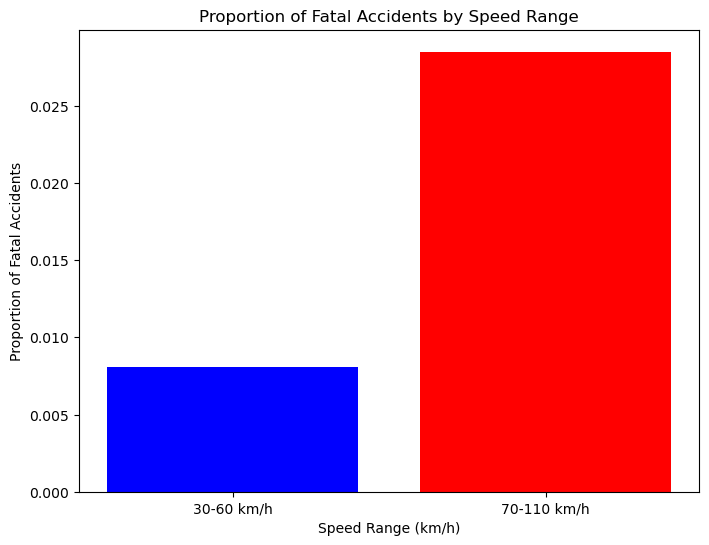

In [10]:
#Q1 Supplementary Chart

# Speed limit ranges
speed_ranges = [(30, 60), (70, 110)]


fatal_proportions = {}

# Loop in defined speed ranges
for speed_range in speed_ranges:
    # Filter df for accidents within speed range
    range_df = df_clean_speed[(df_clean_speed['Speed_limit_numeric'] >= speed_range[0]) & 
                              (df_clean_speed['Speed_limit_numeric'] <= speed_range[1])]
    
    # Total and fatal accidents
    total_accidents = range_df.shape[0]
    fatal_accidents = range_df[range_df['Degree_of_crash'] == 'Fatal'].shape[0]
    
    #Proportion of fatal accidents
    fatal_proportions[f'{speed_range[0]}-{speed_range[1]} km/h'] = fatal_accidents / total_accidents

#Plot
plt.figure(figsize=(8, 6))
plt.bar(fatal_proportions.keys(), fatal_proportions.values(), color=['blue', 'red'])
plt.title('Proportion of Fatal Accidents by Speed Range')
plt.xlabel('Speed Range (km/h)')
plt.ylabel('Proportion of Fatal Accidents')
plt.show()

Coefficients: [-0.00338022 -0.0024105 ]
Intercept: 0.7237901657194153
Mean Squared Error: 0.212398948142157
R^2 Score: 0.00015561067924885208


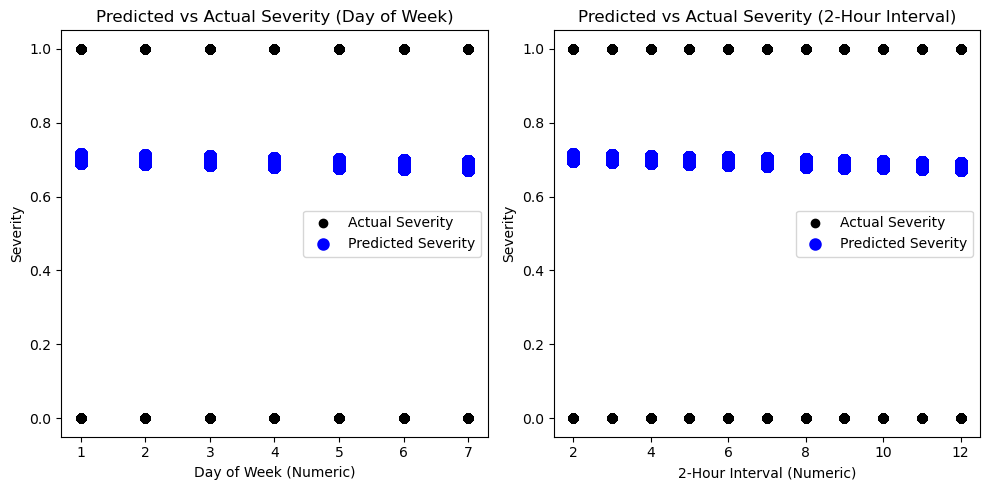

In [11]:
#Q2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df_time_interval = df.copy()

# Encoding days to Numbers
days_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
df_time_interval['Day_of_week_numeric'] = df_time_interval['Day_of_week_of_crash'].map(days_mapping)

# Map 'Two_hour_intervals' to numbers
intervals = {
    '00:00 - 01:59': 1, '02:00 - 03:59': 2, '04:00 - 05:59': 3, '06:00 - 07:59': 4,
    '08:00 - 09:59': 5, '10:00 - 11:59': 6, '12:00 - 13:59': 7, '14:00 - 15:59': 8,
    '16:00 - 17:59': 9, '18:00 - 19:59': 10, '20:00 - 21:59': 11, '22:00 - Midnight': 12
}
df_time_interval['Interval_numeric'] = df_time_interval['Two_hour_intervals'].map(intervals)

# Convert 'Degree_of_crash' into Severity (1 for severe, 0 for not severe)
df_time_interval['Severity'] = df_time_interval['Degree_of_crash'].apply(lambda x: 1 if x in ['Injury', 'Fatal'] else 0)

# Dropping rows with NaN values in 'Day_of_week_numeric' or 'Interval_numeric'
df_clean = df_time_interval.dropna(subset=['Day_of_week_numeric', 'Interval_numeric', 'Severity'])

# Prepare the feature and target variable for linear regression
X = df_clean[['Day_of_week_numeric', 'Interval_numeric']]  # Independent variables
y = df_clean['Severity']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plotting actual vs predicted severity for 'Day_of_week_numeric'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_test['Day_of_week_numeric'], y_test, color='black', label='Actual Severity')
plt.scatter(X_test['Day_of_week_numeric'], y_pred, color='blue', label='Predicted Severity',linewidth = 3)
plt.title('Predicted vs Actual Severity (Day of Week)')
plt.xlabel('Day of Week (Numeric)')
plt.ylabel('Severity')
plt.legend()

# Plotting actual vs predicted severity for 'Interval_numeric'
plt.subplot(1, 2, 2)
plt.scatter(X_test['Interval_numeric'], y_test, color='black', label='Actual Severity')
plt.scatter(X_test['Interval_numeric'], y_pred, color='blue', label='Predicted Severity', linewidth = 3)
plt.title('Predicted vs Actual Severity (2-Hour Interval)')
plt.xlabel('2-Hour Interval (Numeric)')
plt.ylabel('Severity')
plt.legend()

plt.tight_layout()
plt.show()

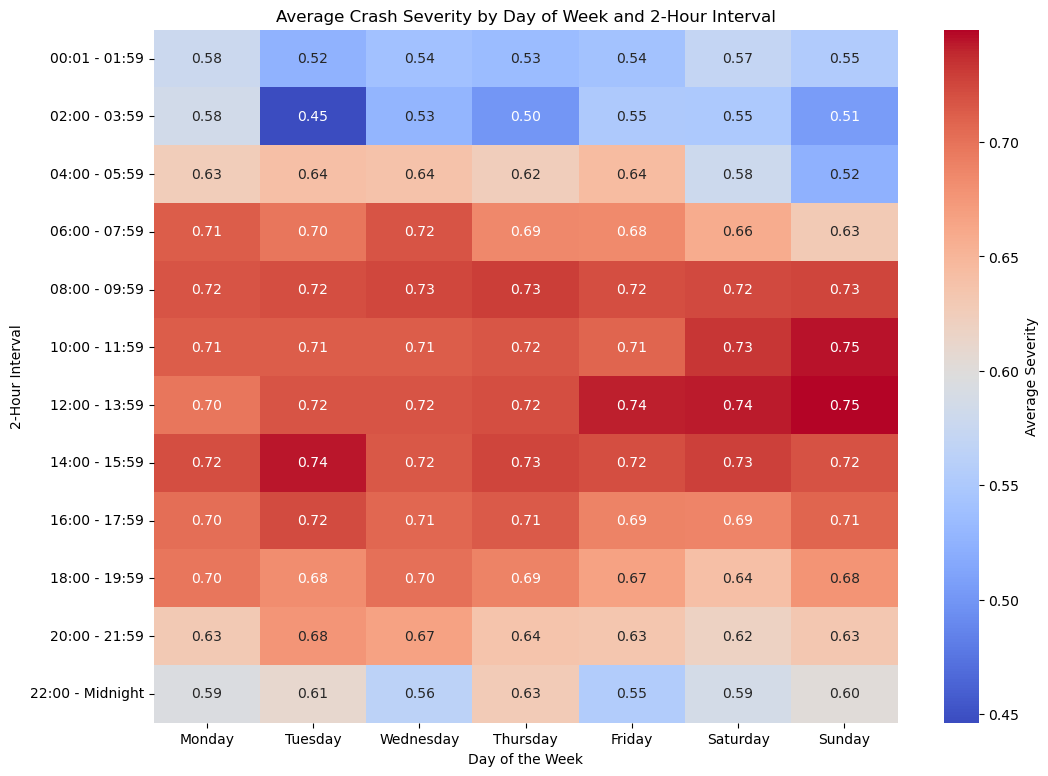

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Remove any "unknown" values in "Two_hour_intervals" and create a new dataframe
df_cleaned = df[df['Two_hour_intervals'] != 'Unknown'].copy()

# Encode 'Severity' based on 'Degree_of_crash'
df_cleaned['Severity'] = df_cleaned['Degree_of_crash'].apply(lambda x: 1 if x in ['Injury', 'Fatal'] else 0)

# Create a pivot table with average severity for each day and interval
severity_pivot = df_cleaned.pivot_table(
    values='Severity', 
    index='Two_hour_intervals', 
    columns='Day_of_week_of_crash', 
    aggfunc='mean'
)

# Reorder the days from Monday to Sunday
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
severity_pivot = severity_pivot[days_order]

# Create the heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(severity_pivot, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Average Severity'})
plt.title('Average Crash Severity by Day of Week and 2-Hour Interval')
plt.xlabel('Day of the Week')
plt.ylabel('2-Hour Interval')
plt.show()

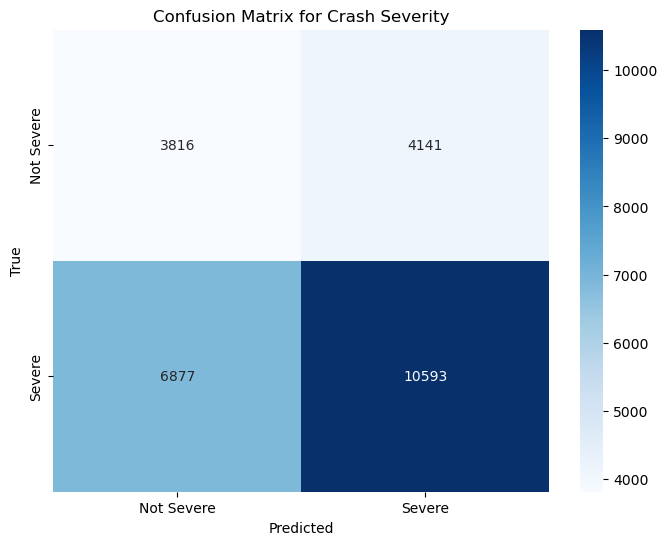

[[ 3816  4141]
 [ 6877 10593]]
Accuracy: 0.5666810870334683
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.48      0.41      7957
           1       0.72      0.61      0.66     17470

    accuracy                           0.57     25427
   macro avg       0.54      0.54      0.53     25427
weighted avg       0.61      0.57      0.58     25427



In [13]:
#Q3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_check = ['Weather', 'Alignment', 'Road_classification', 'Degree_of_crash']

df_log = df.dropna(subset=columns_to_check).copy()

df_log['Severity'] = df_log.apply(lambda row: 1 if 'Fatal' in row.values or 'Injury' in row.values else 0, axis=1)
from sklearn.preprocessing import LabelEncoder

# Initialise the LabelEncoder
label_encoder = LabelEncoder()

# Encoding
df_log.loc[:, 'Weather_encoded'] = label_encoder.fit_transform(df_log['Weather'])
df_log.loc[:, 'Alignment_encoded'] = label_encoder.fit_transform(df_log['Alignment'])
df_log.loc[:, 'Road_classification_encoded'] = label_encoder.fit_transform(df_log['Road_classification'])
df_log.head(15)
X = df_log[['Weather_encoded', 'Alignment_encoded', 'Road_classification_encoded']]
y = df_log['Severity']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the logistic regression model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Xonfusion matrix
cm = confusion_matrix(y_test, y_pred)

# Heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Severe', 'Severe'], yticklabels=['Not Severe', 'Severe'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Crash Severity")
plt.show()

print(cm)
logreg_score = model.score(X_test, y_test)
print(f'Accuracy: {logreg_score}')

class_report = classification_report(y_test, y_pred)

# Print the results
print("Classification Report:")
print(class_report)

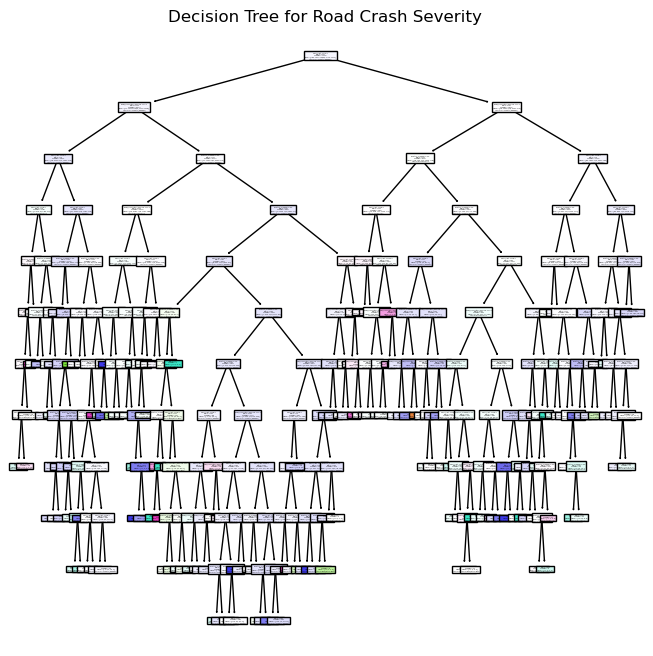

In [14]:
#Tree for Q4
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt

# Encoding Labels
target_label_encoder = LabelEncoder()
# 'Speed_limit' is a string, and replace non-numeric with NaN
df['Speed_limit'] = df['Speed_limit'].astype(str)
df['Speed_limit'] = df['Speed_limit'].str.extract('(\d+)').astype(float)

# Encoding 'Weather' and 'Road_classification' 
if 'Weather' in df.columns and 'Road_classification' in df.columns:
    df['Weather_encoded'] = LabelEncoder().fit_transform(df['Weather'])
    df['Road_classification_encoded'] = LabelEncoder().fit_transform(df['Road_classification'])
else:
    raise ValueError("One of the columns 'Weather' or 'Road_classification' does not exist in the DataFrame.")

# Encoding
if 'Degree_of_crash_detailed' in df.columns:
    df['Degree_of_crash_detailed_encoded'] = target_label_encoder.fit_transform(df['Degree_of_crash_detailed'])
else:
    raise ValueError("'Degree_of_crash_detailed' column does not exist in the DataFrame.")

# Features and target for the Decision Tree
feature_columns = ['Weather_encoded', 'Speed_limit', 'Road_classification_encoded']
target_column = 'Degree_of_crash_detailed_encoded'

# Feature set (X) and labels (y)
X = df[feature_columns]
y = df[target_column]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialise the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(8, 8))
tree.plot_tree(decision_tree, feature_names=feature_columns, class_names=target_label_encoder.classes_.tolist(), filled=True)
plt.title('Decision Tree for Road Crash Severity')
plt.show()

Accuracy: 0.3244518729721758
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       471
           1       0.00      0.00      0.00      5686
           2       0.29      0.40      0.34      8536
           3       0.35      0.61      0.45      9505
           4       0.32      0.10      0.16      6315

    accuracy                           0.32     30513
   macro avg       0.19      0.22      0.19     30513
weighted avg       0.26      0.32      0.27     30513



/Users/kavinguna/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/kavinguna/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/kavinguna/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



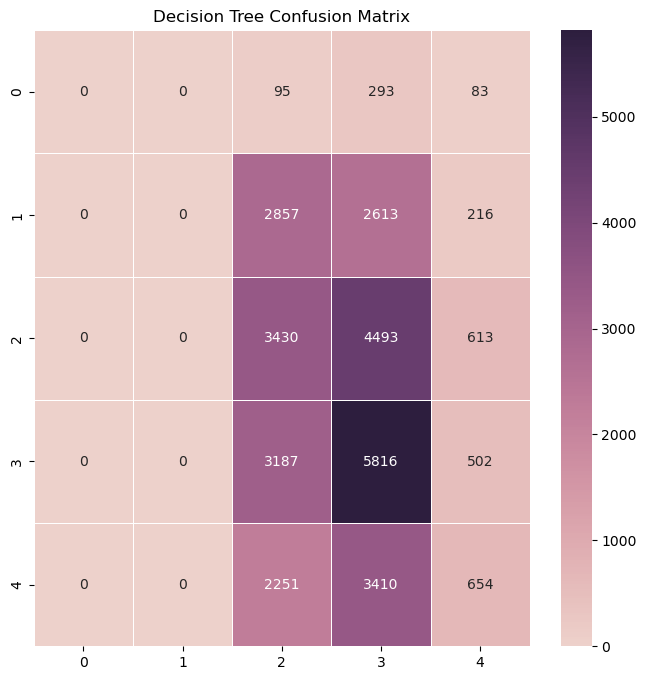

Accuracy: 0.3244518729721758
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       471
           1       0.00      0.00      0.00      5686
           2       0.29      0.40      0.34      8536
           3       0.35      0.61      0.45      9505
           4       0.32      0.10      0.16      6315

    accuracy                           0.32     30513
   macro avg       0.19      0.22      0.19     30513
weighted avg       0.26      0.32      0.27     30513



/Users/kavinguna/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/kavinguna/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/kavinguna/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



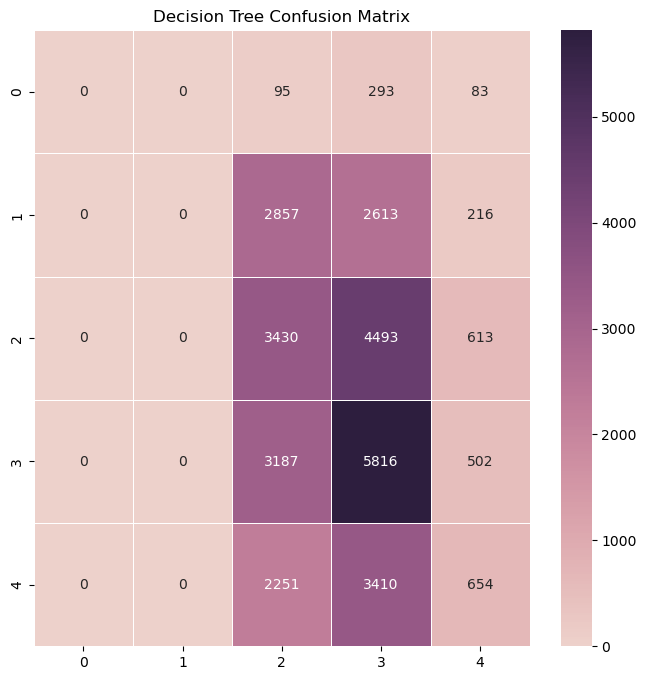

In [15]:
#Confusion matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
max_depth = 3 

# Initialize the decision tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=max_depth)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Predictions
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
dtcla_cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(dtcla_cm, annot=True, linewidth=0.7, fmt='g', ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title('Decision Tree Confusion Matrix')
plt.show()

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
max_depth = 3 

# Initialise the decision tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=max_depth)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Predictions
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
dtcla_cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(dtcla_cm, annot=True, linewidth=0.7, fmt='g', ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title('Decision Tree Confusion Matrix')
plt.show()